# INSTALLING DEPENDENCIES & LIBRARIES

In [ ]:
!pip install pycaret

In [ ]:
!pip install xgboost

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('/content/drive/My Drive/custom_project_2/data_file.csv')
df.head()

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


In [ ]:
df['Benign'].value_counts()

0    35367
1    27118
Name: Benign, dtype: int64

In [ ]:
df = df.iloc[:, 2:]
df.head()

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


# EXPLORATORY DATA ANALYSIS

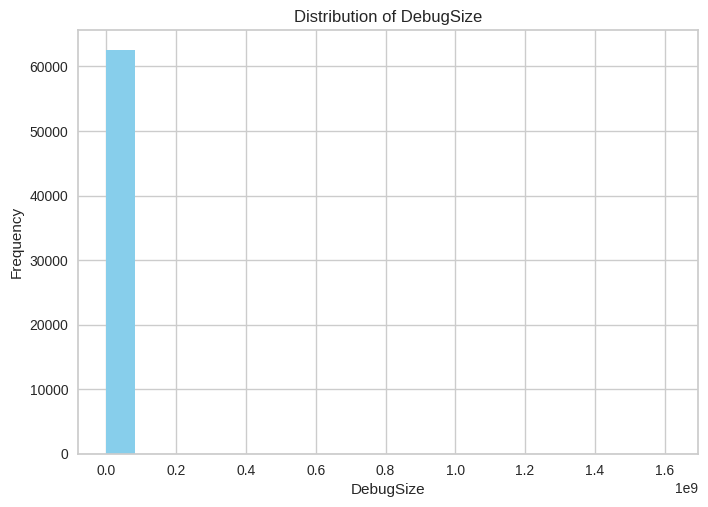

In [ ]:
df['DebugSize'].hist(bins=20, color='skyblue')
plt.xlabel('DebugSize')
plt.ylabel('Frequency')
plt.title('Distribution of DebugSize')
plt.show()

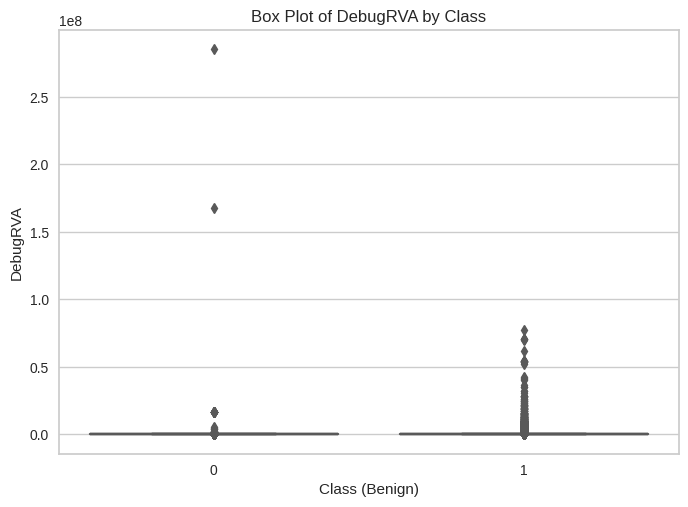

In [ ]:
sns.boxplot(x='Benign', y='DebugRVA', data=df, palette='Set2')
plt.xlabel('Class (Benign)')
plt.ylabel('DebugRVA')
plt.title('Box Plot of DebugRVA by Class')
plt.show()

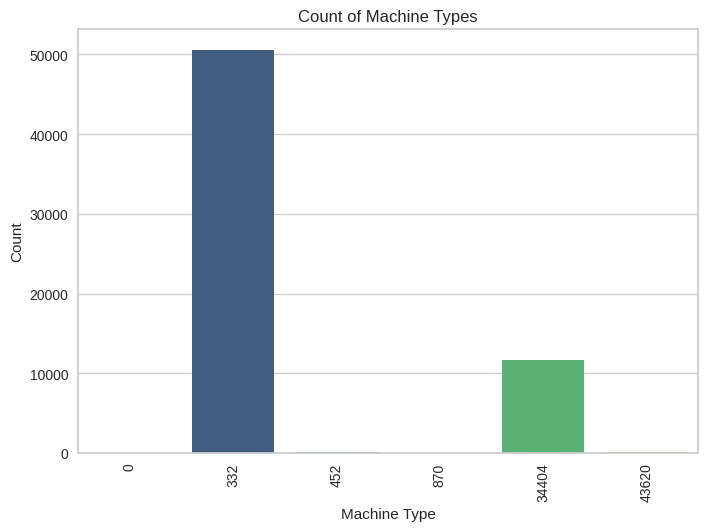

In [ ]:
sns.countplot(x='Machine', data=df, palette='viridis')
plt.xlabel('Machine Type')
plt.ylabel('Count')
plt.title('Count of Machine Types')
plt.xticks(rotation=90)
plt.show()

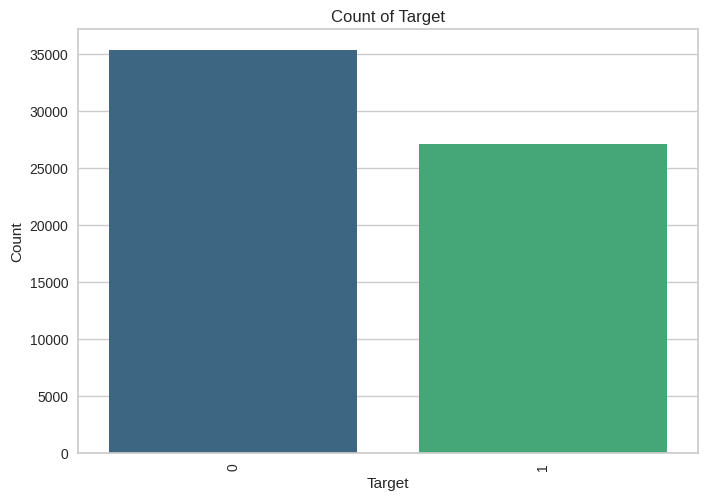

In [ ]:
sns.countplot(x='Benign', data=df, palette='viridis')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count of Target')
plt.xticks(rotation=90)
plt.show()

# MODEL EVALUATION AND COMPARISON

In [ ]:
from pycaret.classification import *

In [ ]:
s = setup(df, target='Benign', session_id=123)

,Description,Value
0,Session id,123
1,Target,Benign
2,Target type,Binary
3,Original data shape,"(62485, 16)"
4,Transformed data shape,"(62485, 16)"
5,Transformed train set shape,"(43739, 16)"
6,Transformed test set shape,"(18746, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [ ]:
selected_models = ['rf', 'gbc', 'xgboost', 'ada', 'dt', 'lr', 'svm']
best_model = compare_models(selected_models, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9964,0.9994,0.9949,0.9968,0.9959,0.9927,0.9927,2.1730
xgboost,Extreme Gradient Boosting,0.9961,0.9997,0.9943,0.9968,0.9955,0.9921,0.9921,0.4040
dt,Decision Tree Classifier,0.9939,0.9940,0.9932,0.9927,0.9929,0.9875,0.9875,0.1480
gbc,Gradient Boosting Classifier,0.9910,0.9982,0.9868,0.9924,0.9896,0.9817,0.9817,4.4130
ada,Ada Boost Classifier,0.9833,0.9975,0.9826,0.9790,0.9808,0.9660,0.9660,1.3680
lr,Logistic Regression,0.7780,0.8942,0.5888,0.8553,0.6973,0.5313,0.5545,0.9280
svm,SVM - Linear Kernel,0.6708,0.0000,0.5652,0.6345,0.5974,0.3209,0.3226,0.2250


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

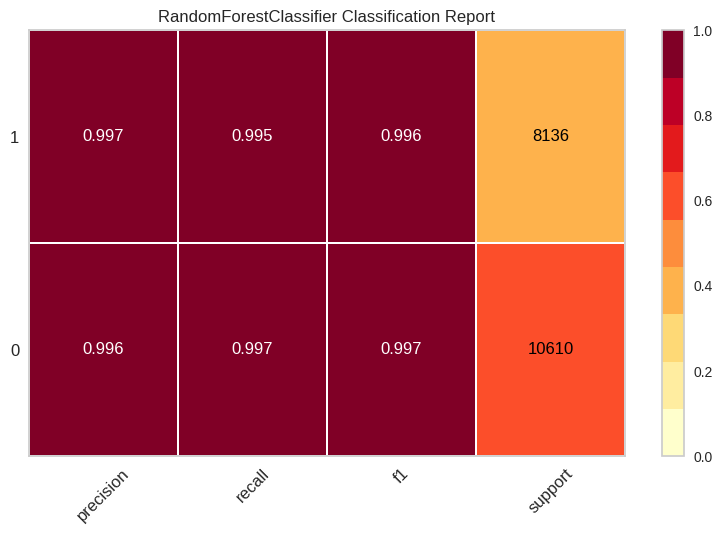

In [ ]:
plot_model(best_model, plot='class_report')

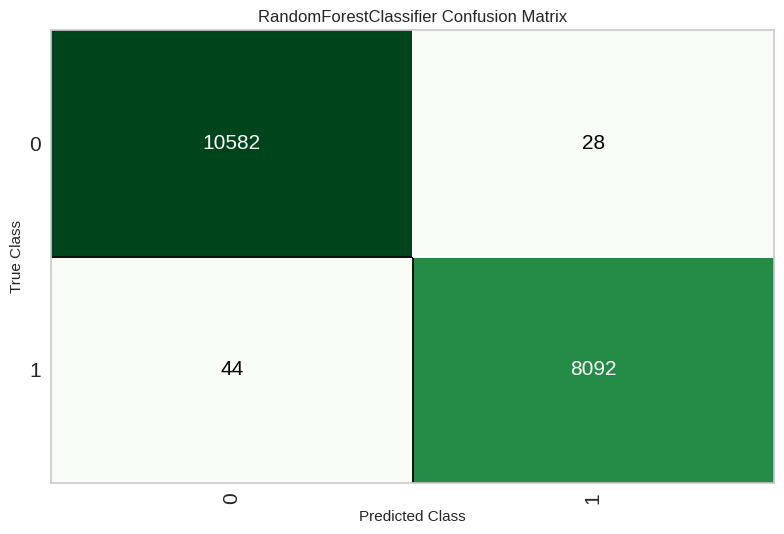

In [ ]:
plot_model(best_model, plot='confusion_matrix')

# MODEL BUILDING

In [ ]:
rfm = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9961,0.9994,0.9947,0.9963,0.9955,0.9921,0.9921
1,0.9973,0.9999,0.9947,0.9989,0.9968,0.9944,0.9944
2,0.9968,0.9997,0.9958,0.9968,0.9963,0.9935,0.9935
3,0.9957,0.9996,0.9942,0.9958,0.9950,0.9912,0.9912
4,0.9950,0.9996,0.9926,0.9958,0.9942,0.9898,0.9898
5,0.9970,0.9989,0.9953,0.9979,0.9966,0.9939,0.9940
6,0.9968,0.9992,0.9958,0.9968,0.9963,0.9935,0.9935
7,0.9973,0.9989,0.9958,0.9979,0.9968,0.9944,0.9944
8,0.9963,0.9994,0.9953,0.9963,0.9958,0.9926,0.9926


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(rfm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
X = df.drop('Benign',axis=1)
y = df['Benign']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print('Shape of the training input data:', X_train.shape)
print('Shape of the training output data:', y_train.shape)
print('Shape of the test input data:', X_test.shape)
print('Shape of the test output data:', y_test.shape)

Shape of the training input data: (43739, 15)
Shape of the training output data: (43739,)
Shape of the test input data: (18746, 15)
Shape of the test output data: (18746,)


In [ ]:
predictions = predict_model(rfm, data=pd.concat([X_test, y_test], axis=1))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9986,0.9997,0.9981,0.9986,0.9984,0.9972,0.9972


In [ ]:
predictions

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign,prediction_label,prediction_score
9435,34404,28,55868,0,5,0,0,0,11,0,3,0,33088,1312,0,1,1,1.0
9140,332,28,149660,0,5,0,0,0,11,0,3,0,34112,1228,0,1,1,1.0
29903,332,0,0,1,4,14848,36864,0,6,0,3,1048576,0,111280,0,0,0,1.0
7537,332,84,14640,10,6,56448,226,69632,14,10,5,1048576,320,1424,0,1,1,1.0
33211,332,0,0,0,5,0,0,98304,9,0,10,1048576,0,912,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22461,34404,84,493392,0,6,575296,160,401408,14,10,8,1048576,16736,2328,0,1,1,1.0
12423,332,84,13200,10,10,0,0,65536,14,10,7,262144,49600,4120,0,1,1,1.0
38141,332,0,0,0,5,0,0,0,40,186,3,1048576,0,0,0,0,0,1.0
24866,34404,28,5024,6,6,45008,190,4096,9,0,5,262144,64,79008,0,1,1,1.0


In [ ]:
predictions_comparison = predictions[['Benign',	'prediction_label',	'prediction_score']]
predictions_comparison

,Benign,prediction_label,prediction_score
9435,1,1,1.0
9140,1,1,1.0
29903,0,0,1.0
7537,1,1,1.0
33211,0,0,1.0
...,...,...,...
22461,1,1,1.0
12423,1,1,1.0
38141,0,0,1.0
24866,1,1,1.0


In [ ]:
len(predictions_comparison[predictions_comparison['Benign'] != predictions_comparison['prediction_label']])

26

In [ ]:
file_path = '/content/drive/My Drive/custom_project_2/rfm_model'
save_model(rfm, file_path)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Machine', 'DebugSize', 'DebugRVA',
                                              'MajorImageVersion',
                                              'MajorOSVersion', 'ExportRVA',
                                              'ExportSize', 'IatVRA',
                                              'MajorLinkerVersion',
                                              'MinorLinkerVersion',
                                              'NumberOfSections',
                                              'SizeOfStackReserve',
                                              'DllCharacteristics',
                                              'ResourceSize',
                                              'BitcoinAddresses'],
                                     t...
                  RandomForestClassifier(bootstrap=True, ccp_alph

In [ ]:
loaded_model = load_model(file_path)

Transformation Pipeline and Model Successfully Loaded


# PREDICTIONS FOR RANDOM RECORDS

In [ ]:
random_records = df.sample(n=10, random_state=0)
random_records_filtered = random_records.iloc[:, :-1]
random_records_class = random_records['Benign']

In [ ]:
predict = predict_model(rfm, data=random_records_filtered)

In [ ]:
predict['Predicted'] = predict['prediction_label']

In [ ]:
predict['Actual'] = random_records_class

In [ ]:
final_predictions = predict[['Actual','Predicted']]
final_predictions

,Actual,Predicted
9435,1,1
9140,1,1
29903,0,0
7537,1,1
33211,0,0
24018,1,1
53780,0,0
34271,0,0
14321,1,1
56913,0,0


# ANALYSIS CHART

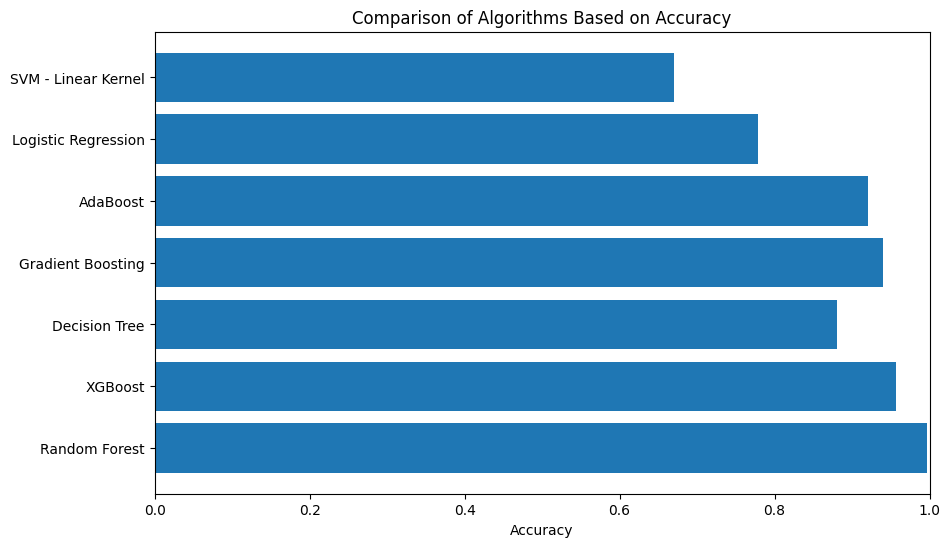

In [4]:
algorithms = ["Random Forest", "XGBoost", "Decision Tree", "Gradient Boosting", "AdaBoost", "Logistic Regression", "SVM - Linear Kernel"]
accuracies = [0.9964, 0.9561, 0.88, 0.94, 0.92, 0.7780, 0.6708]
plt.figure(figsize=(10, 6))
plt.barh(algorithms, accuracies)
plt.xlabel('Accuracy')
plt.title('Comparison of Algorithms Based on Accuracy')
plt.xlim(0.0, 1.0)
plt.show()